<a href="https://colab.research.google.com/github/niigoatnightcord/595project/blob/main/AMS595_PythonProj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy.linalg import eig

# web network
M = np.array([
    [0, 0, 1/2, 0],
    [1/3, 0, 0, 1/2],
    [1/3, 1/2, 0, 1/2],
    [1/3, 1/2, 1/2, 0]
], dtype=float)

# compute the dominant eigenvector
eigenvalues, eigenvectors = eig(M)
dominant_index = np.argmax(np.real(eigenvalues))  # index of the dominant eigenvalue
dominant_eigenvector = np.real(eigenvectors[:, dominant_index])  #corresponding eigenvector

#normalize the dominant eigenvector
page_rank_scores_eigen = dominant_eigenvector / np.sum(dominant_eigenvector)

# iterate to convergence
v = np.ones(M.shape[0]) / M.shape[0]  #initial rank vector (normalized)
tolerance = 1e-6  #threshold
difference = 1  #initialize difference

while difference > tolerance:
    new_v = np.dot(M, v)
    difference = np.linalg.norm(new_v - v, 1)
    v = new_v

#normalize the rank vector
page_rank_scores_iterative = v / np.sum(v)

# highest eigenvector-based and iterative scores
highest_score = max(page_rank_scores_iterative)
highest_ranked_pages = [i + 1 for i, score in enumerate(page_rank_scores_iterative) if score == highest_score]

print("Dominant eigenvector:", dominant_eigenvector)
print("Rank vector:", v)
print("Eigenvector-based PageRank Scores:", page_rank_scores_eigen)
print("Iterative PageRank Scores:", page_rank_scores_iterative)
print("Highest-ranked Pages:", highest_ranked_pages)


Dominant eigenvector: [0.30460385 0.40613847 0.6092077  0.6092077 ]
Rank vector: [0.15789468 0.21052625 0.31578954 0.31578954]
Eigenvector-based PageRank Scores: [0.15789474 0.21052632 0.31578947 0.31578947]
Iterative PageRank Scores: [0.15789468 0.21052625 0.31578954 0.31578954]
Highest-ranked Pages: [3, 4]


# New Section

Data:
 [[ 1.76405235  1.8831507 ]
 [ 0.40015721 -1.34775906]
 [ 0.97873798 -1.270485  ]
 [ 2.2408932   0.96939671]
 [ 1.86755799 -1.17312341]
 [-0.97727788  1.94362119]
 [ 0.95008842 -0.41361898]
 [-0.15135721 -0.74745481]
 [-0.10321885  1.92294203]
 [ 0.4105985   1.48051479]
 [ 0.14404357  1.86755896]
 [ 1.45427351  0.90604466]
 [ 0.76103773 -0.86122569]
 [ 0.12167502  1.91006495]
 [ 0.44386323 -0.26800337]
 [ 0.33367433  0.8024564 ]
 [ 1.49407907  0.94725197]
 [-0.20515826 -0.15501009]
 [ 0.3130677   0.61407937]
 [-0.85409574  0.92220667]
 [-2.55298982  0.37642553]
 [ 0.6536186  -1.09940079]
 [ 0.8644362   0.29823817]
 [-0.74216502  1.3263859 ]
 [ 2.26975462 -0.69456786]
 [-1.45436567 -0.14963454]
 [ 0.04575852 -0.43515355]
 [-0.18718385  1.84926373]
 [ 1.53277921  0.67229476]
 [ 1.46935877  0.40746184]
 [ 0.15494743 -0.76991607]
 [ 0.37816252  0.53924919]
 [-0.88778575 -0.67433266]
 [-1.98079647  0.03183056]
 [-0.34791215 -0.63584608]
 [ 0.15634897  0.67643329]
 [ 1.23029068  0.5765

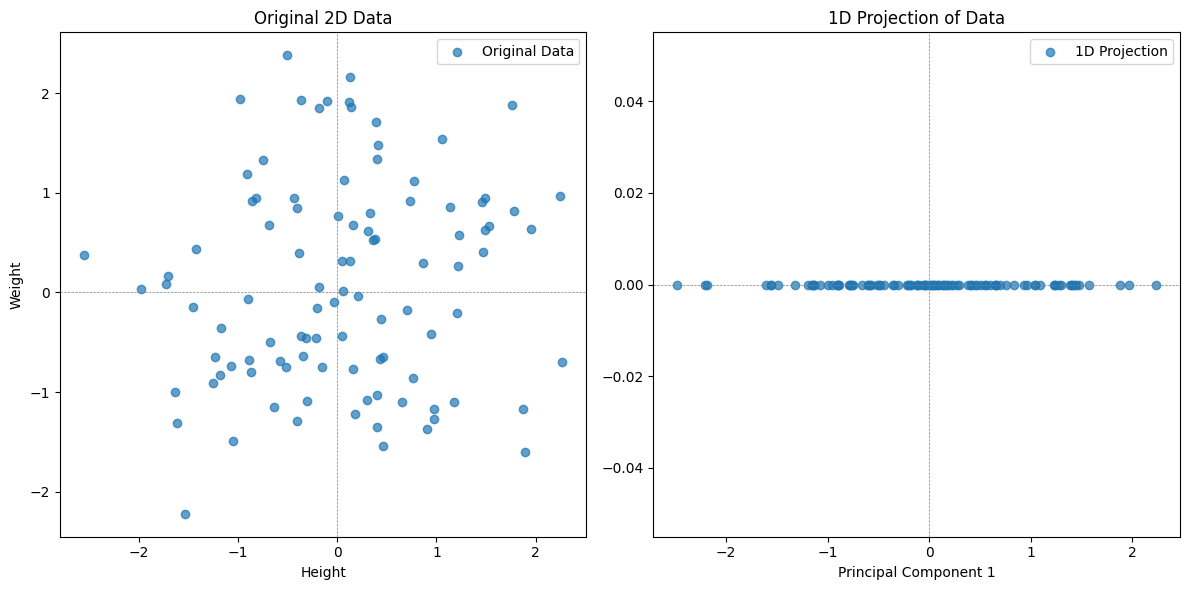

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

#import the dataset
data = pd.read_csv('data.csv').values  # Convert DataFrame to NumPy array

print("Data:\n", data)

#covariance matrix
cov_matrix = np.cov(data, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)

#eigenvalue decomposition
eigenvalues, eigenvectors = eigh(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

#principal components
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]# in the order of eigenvalues
principal_components = eigenvectors#principal component is columns of eigenvectors
print("Principal Components:\n", principal_components)

#project data onto the first principal component
pc1 = principal_components[:, 0]
data_1d = np.dot(data, pc1)
print("Projected Data (1D):\n", data_1d)


plt.figure(figsize=(12, 6))

#scatter plot of original 2D data
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], alpha=0.7, label="Original Data")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Original 2D Data")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()

#1D projection
plt.subplot(1, 2, 2)
plt.scatter(data_1d, np.zeros_like(data_1d), alpha=0.7, label="1D Projection")
plt.xlabel("Principal Component 1")
plt.title("1D Projection of Data")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
import numpy as np
from scipy.linalg import lstsq, solve

#houses info and prices
X = np.array([[2100, 3, 20],
              [2500, 4, 15],
              [1800, 2, 30],
              [2200, 3, 25]])
y = np.array([460, 540, 330, 400])

#least-squares
# Xβ = y, where β is the coefficients vector
print("Design Matrix X:\n", X)
print("Target Vector y:\n", y)

#solve for β using least squares
beta, residuals, rank, s = lstsq(X, y, cond=None)
print("\nCoefficients (β):", beta)
print("Residuals:", residuals)
print("Rank of X:", rank)
print("Singular Values of X:", s)

# predict the price of a house with Xβ = y
new_house = np.array([2400, 3, 20])  #new house info
predicted_price = np.dot(new_house, beta)  # y = Xβ
print("\nPredicted Price for house (2400 sqft, 3 beds, 20 years):", predicted_price, "($1000s)")

#compare to an alternative method: Direct solution using `solve`
normal_matrix = np.dot(X.T, X)  #normal matrix X^T X
y_n = np.dot(X.T, y)  #X^T y

# in case the matrix is not invertible
try:
    beta_direct = solve(normal_matrix, y_n)
    print("\nCoefficients (β) via direct solve:", beta_direct)
    predicted_price_direct = np.dot(new_house, beta_direct)
    print("Predicted Price using direct solve:", predicted_price_direct, "($1000s)")
except np.linalg.LinAlgError as e:
    print("\nDirect solve method failed:", str(e))# in case the matrix is not invertible


Design Matrix X:
 [[2100    3   20]
 [2500    4   15]
 [1800    2   30]
 [2200    3   25]]
Target Vector y:
 [460 540 330 400]

Coefficients (β): [    3.2875 -1628.75     -77.75  ]
Residuals: 24.999999999988063
Rank of X: 3
Singular Values of X: [4.32919549e+03 1.59510474e+01 2.89623364e-02]

Predicted Price for house (2400 sqft, 3 beds, 20 years): 1448.7500000000373 ($1000s)

Coefficients (β) via direct solve: [    3.2875     -1628.75000001   -77.75      ]
Predicted Price using direct solve: 1448.7500000035438 ($1000s)


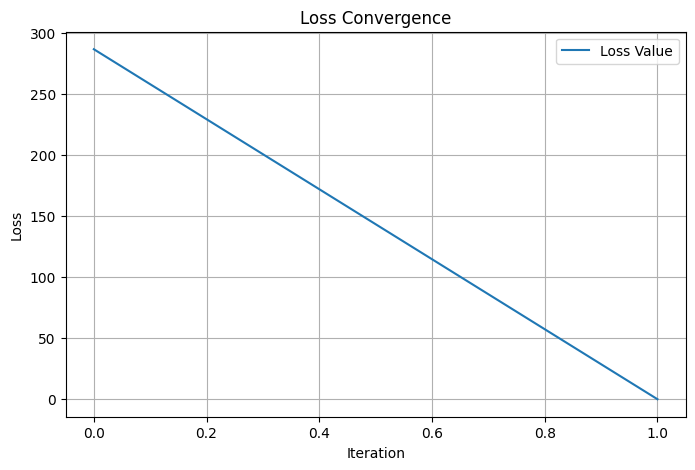

Optimization Successful: True
Final Loss Value: 1.6980834192159392e-28
Number of Iterations: 2


In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#loss function and its gradient
def loss_function(X, A):
    """
    Loss function: f(X) = 1/2 * sum((X_ij - A_ij)^2)
    """
    X_matrix = X.reshape(A.shape)  #reshape flat X into a matrix of A's shape
    return 0.5 * np.sum((X_matrix - A) ** 2)

def gradient(X, A):
    """
    Gradient of the loss function: ∇f(X) = X - A
    """
    X_matrix = X.reshape(A.shape)
    return (X_matrix - A).flatten()

#initialization
np.random.seed(23)#use seed to make sure reproduciblity
rows, cols = 100, 50
A = np.random.rand(rows, cols)  #initialize matrix A with random values
X_init = np.random.rand(rows, cols)  #initialize matrix X with random values

#gradient descent using scipy.optimize.minimize
loss_values = []  #track the loss over iterations

def callback(X):
    """
    Callback function to record the loss at each iteration.
    """
    loss_values.append(loss_function(X, A))

# minimize using the L-BFGS-B algorithm
result = minimize(
    fun=loss_function,
    x0=X_init.flatten(),
    args=(A,),
    jac=gradient,
    method='L-BFGS-B',
    callback=callback,
    options={'gtol': 1e-6, 'maxiter': 1000}
)

# reshape the optimized result back to matrix form
X_optimized = result.x.reshape(A.shape)

# plot the loss values over iterations
plt.figure(figsize=(8, 5))
plt.plot(loss_values, label='Loss Value')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Convergence')
plt.legend()
plt.grid()
plt.show()


print("Optimization Successful:", result.success)
print("Final Loss Value:", result.fun)
print("Number of Iterations:", len(loss_values))


In [10]:
!pwd


/content
